# 컨볼루션 신경망 실행

이미지 인식 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

2025-04-26 18:54:50.314605: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-26 18:54:50.323887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745661290.335720  563074 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745661290.339435  563074 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745661290.349964  563074 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ -2s -0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


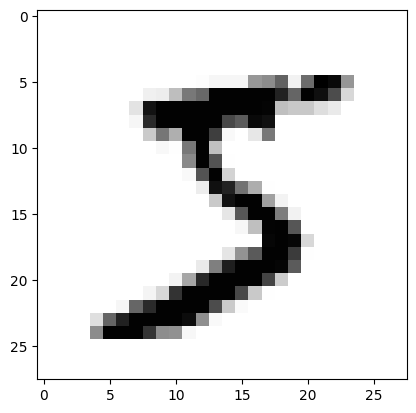

In [2]:
# 첫 번째 이미지를 확인
plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [3]:
# 이미지가 인식되는 원리를 알아보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [4]:
# 차원 변환 과정을 실습
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype("float64") / 255

# 클래스 값을 확인
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


딥러닝 기본 프레임 만들기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋 분리
X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

/home/kunsu/miniconda3/envs/fast/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1745661365.356318  563074 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 실행 환경을 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 최적화를 위한 설정
# modelpath = "./MNIST_MLP.hdf5"
modelpath = "./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18651, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18651 to 0.13502, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13502 to 0.11410, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11410 to 0.09480, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.09480 to 0.09042, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09042 to 0.08579, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08579

Epoch 8: val_loss improved from 0.08579 to 0.08405, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss improved from 0.08405 to 0.08202, saving model to ./MNIST_MLP.keras

Epoch 10: val_loss did not improve from 0.08202

Epoch 11: val_loss did not improve from 0.08202

Epoch 12: val_loss did not improve from 0.08202

Epoch 13: val_loss did not improve from 0.08202

Epoch 14: val_loss did not improve from 0.08202

Epoch 15: val_

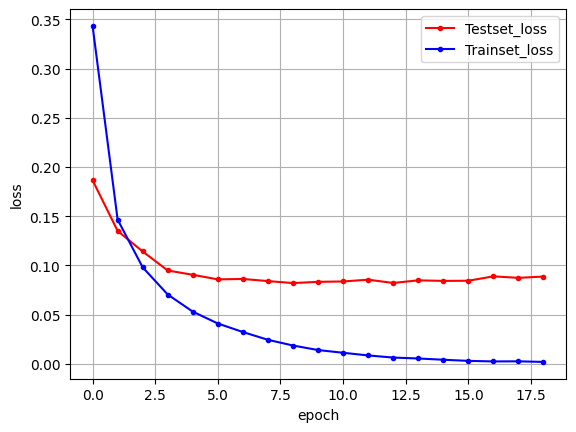

In [8]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드와 레이블을 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

CNN 실행

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# 모델의 실행 옵션을 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# 모델 최적화를 위한 설정
# modelpath = "./MNIST_CNN.hdf5"
modelpath = "./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08435, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08435 to 0.05636, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05636 to 0.05155, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.05155 to 0.04596, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04596 to 0.04264, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04264 to 0.04166, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss did not improve from 0.04166

Epoch 8: val_loss did not improve from 0.04166

Epoch 9: val_loss improved from 0.04166 to 0.04008, saving model to ./MNIST_CNN.keras

Epoch 10: val_loss did not improve from 0.04008

Epoch 11: val_loss did not improve from 0.04008

Epoch 12: val_loss did not improve from 0.04008

Epoch 13: val_loss did not improve from 0.04008

Epoch 14: val_loss did not improve from 0.04008

Epoch 15: val_loss did not improve from 0.04008

Epoc

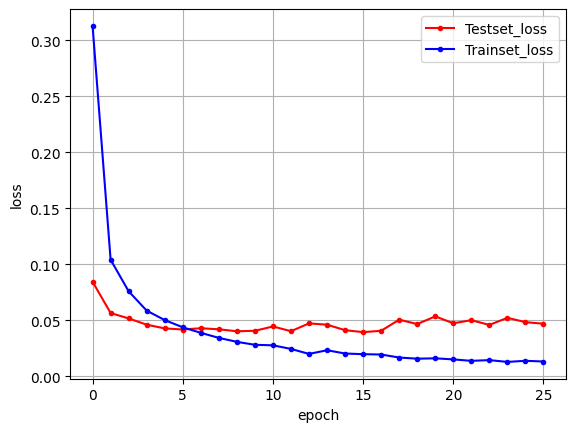

In [11]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프 출력
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드와 레이블 표시
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()